In [53]:
import skimage.morphology as morphology
import scipy.ndimage as ndimage
import numpy as np
from skimage.morphology import square

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
import math
import preprocessing_project as pre


In [54]:

df = pd.read_csv("Labels/classes.csv")

In [55]:
b = io.imread("CT/test/Homm/49_15.jpg")


In [56]:
image = b
image_after = pre.real_noise_cancel(image)


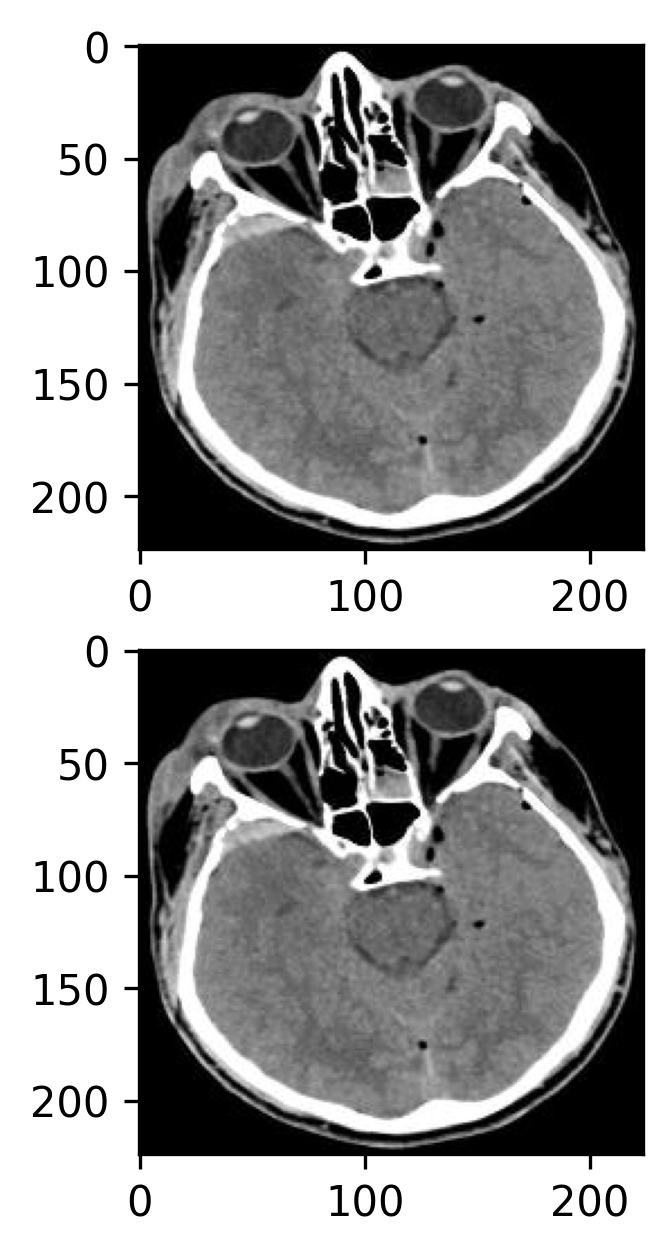

In [57]:
fig = plt.figure(dpi = 300)
ax1 = plt.subplot(2,1,1)
ax1.imshow(image, cmap = 'gray')


ax3 = plt.subplot(2,1, 2)
ax3.imshow( image_after ,cmap = 'gray')



(223, 223)
(223, 223)
255


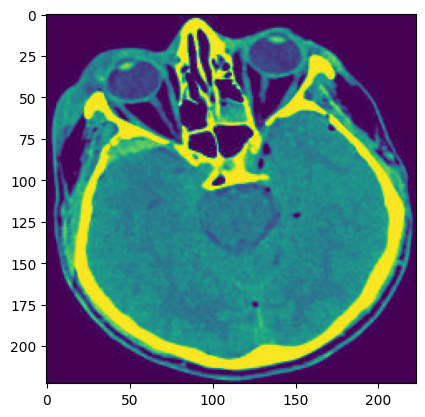

In [58]:

plt.imshow(pre.crop(image_after))

print(pre.crop(image_after).max())



(223, 223)
255


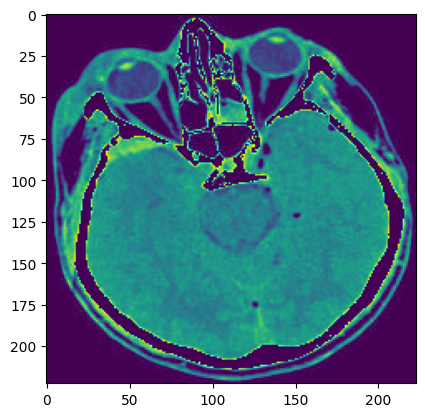

In [59]:
image = b

image = pre.real_noise_cancel(image)



plt.imshow(pre.delete_skull(pre.crop(image)))
print(image.max())



(214, 198)


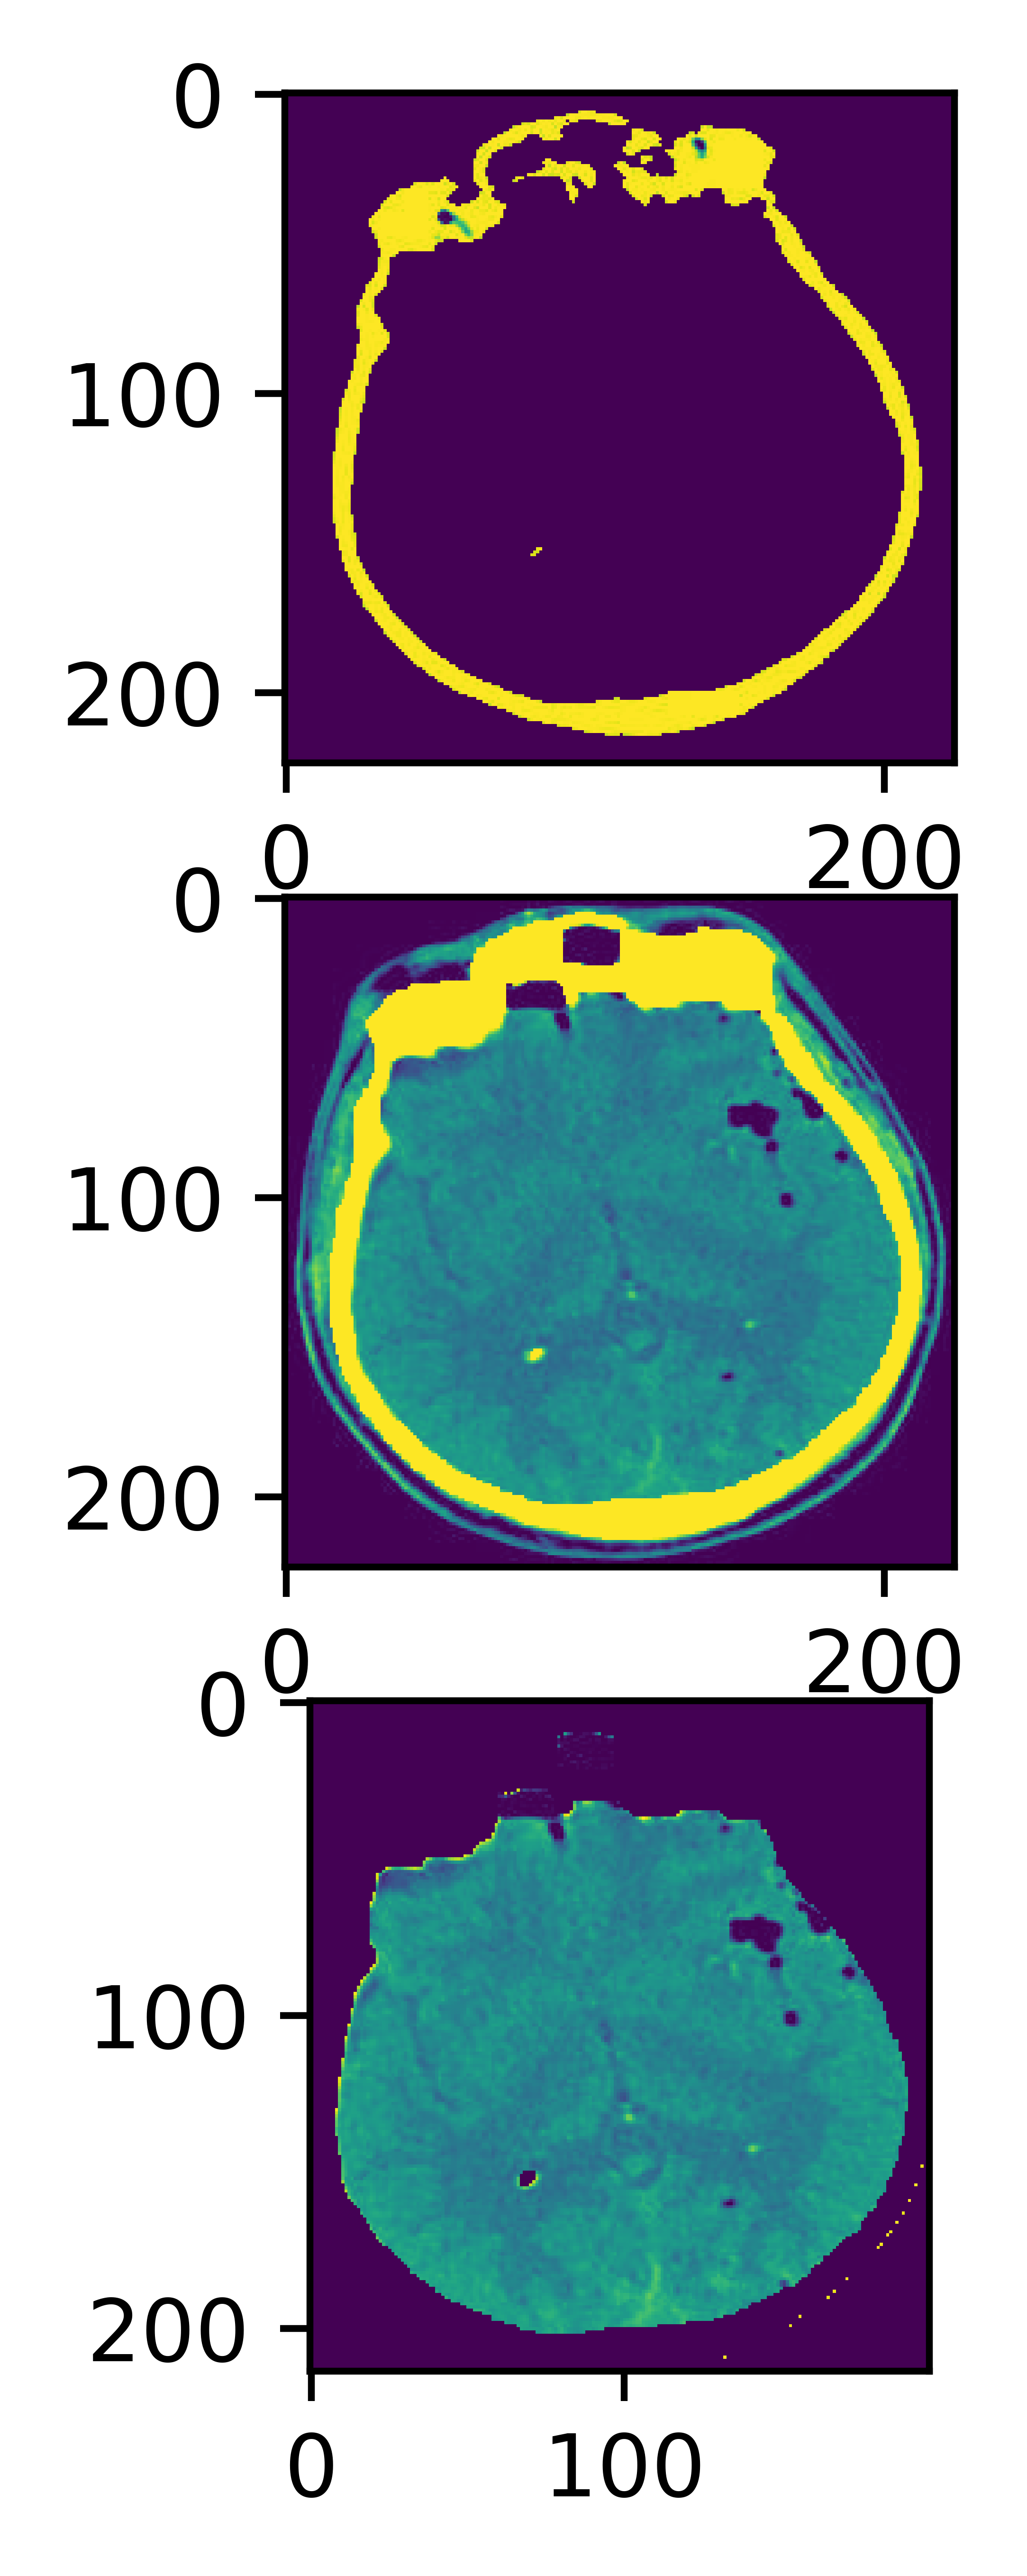

In [69]:
image = io.imread("CT/test/No_homm/49_19.jpg")
def close_skull(img):
    mask = (img > 230) & img
    
    mask = morphology.dilation(mask, np.ones((11, 11)))
    mask = morphology.erosion(mask, np.ones((10, 10)))
    for x in range(img.shape[0]):
       for y in range(img.shape[1]):
          img[x, y] = 255 if mask[x, y] == True else img[x, y]
    return img

plt.figure(dpi = 1300)
from skimage.morphology import flood, flood_fill

plt.subplot(3, 1, 1)
plt.imshow(pre.flood_(image))
plt.subplot(3, 1, 2)
cos = close_skull(image)
plt.imshow(cos)
plt.subplot(3, 1, 3)
new_img = pre.delete_skull(pre.crop(pre.flood_(close_skull(cos))))
plt.imshow(new_img)



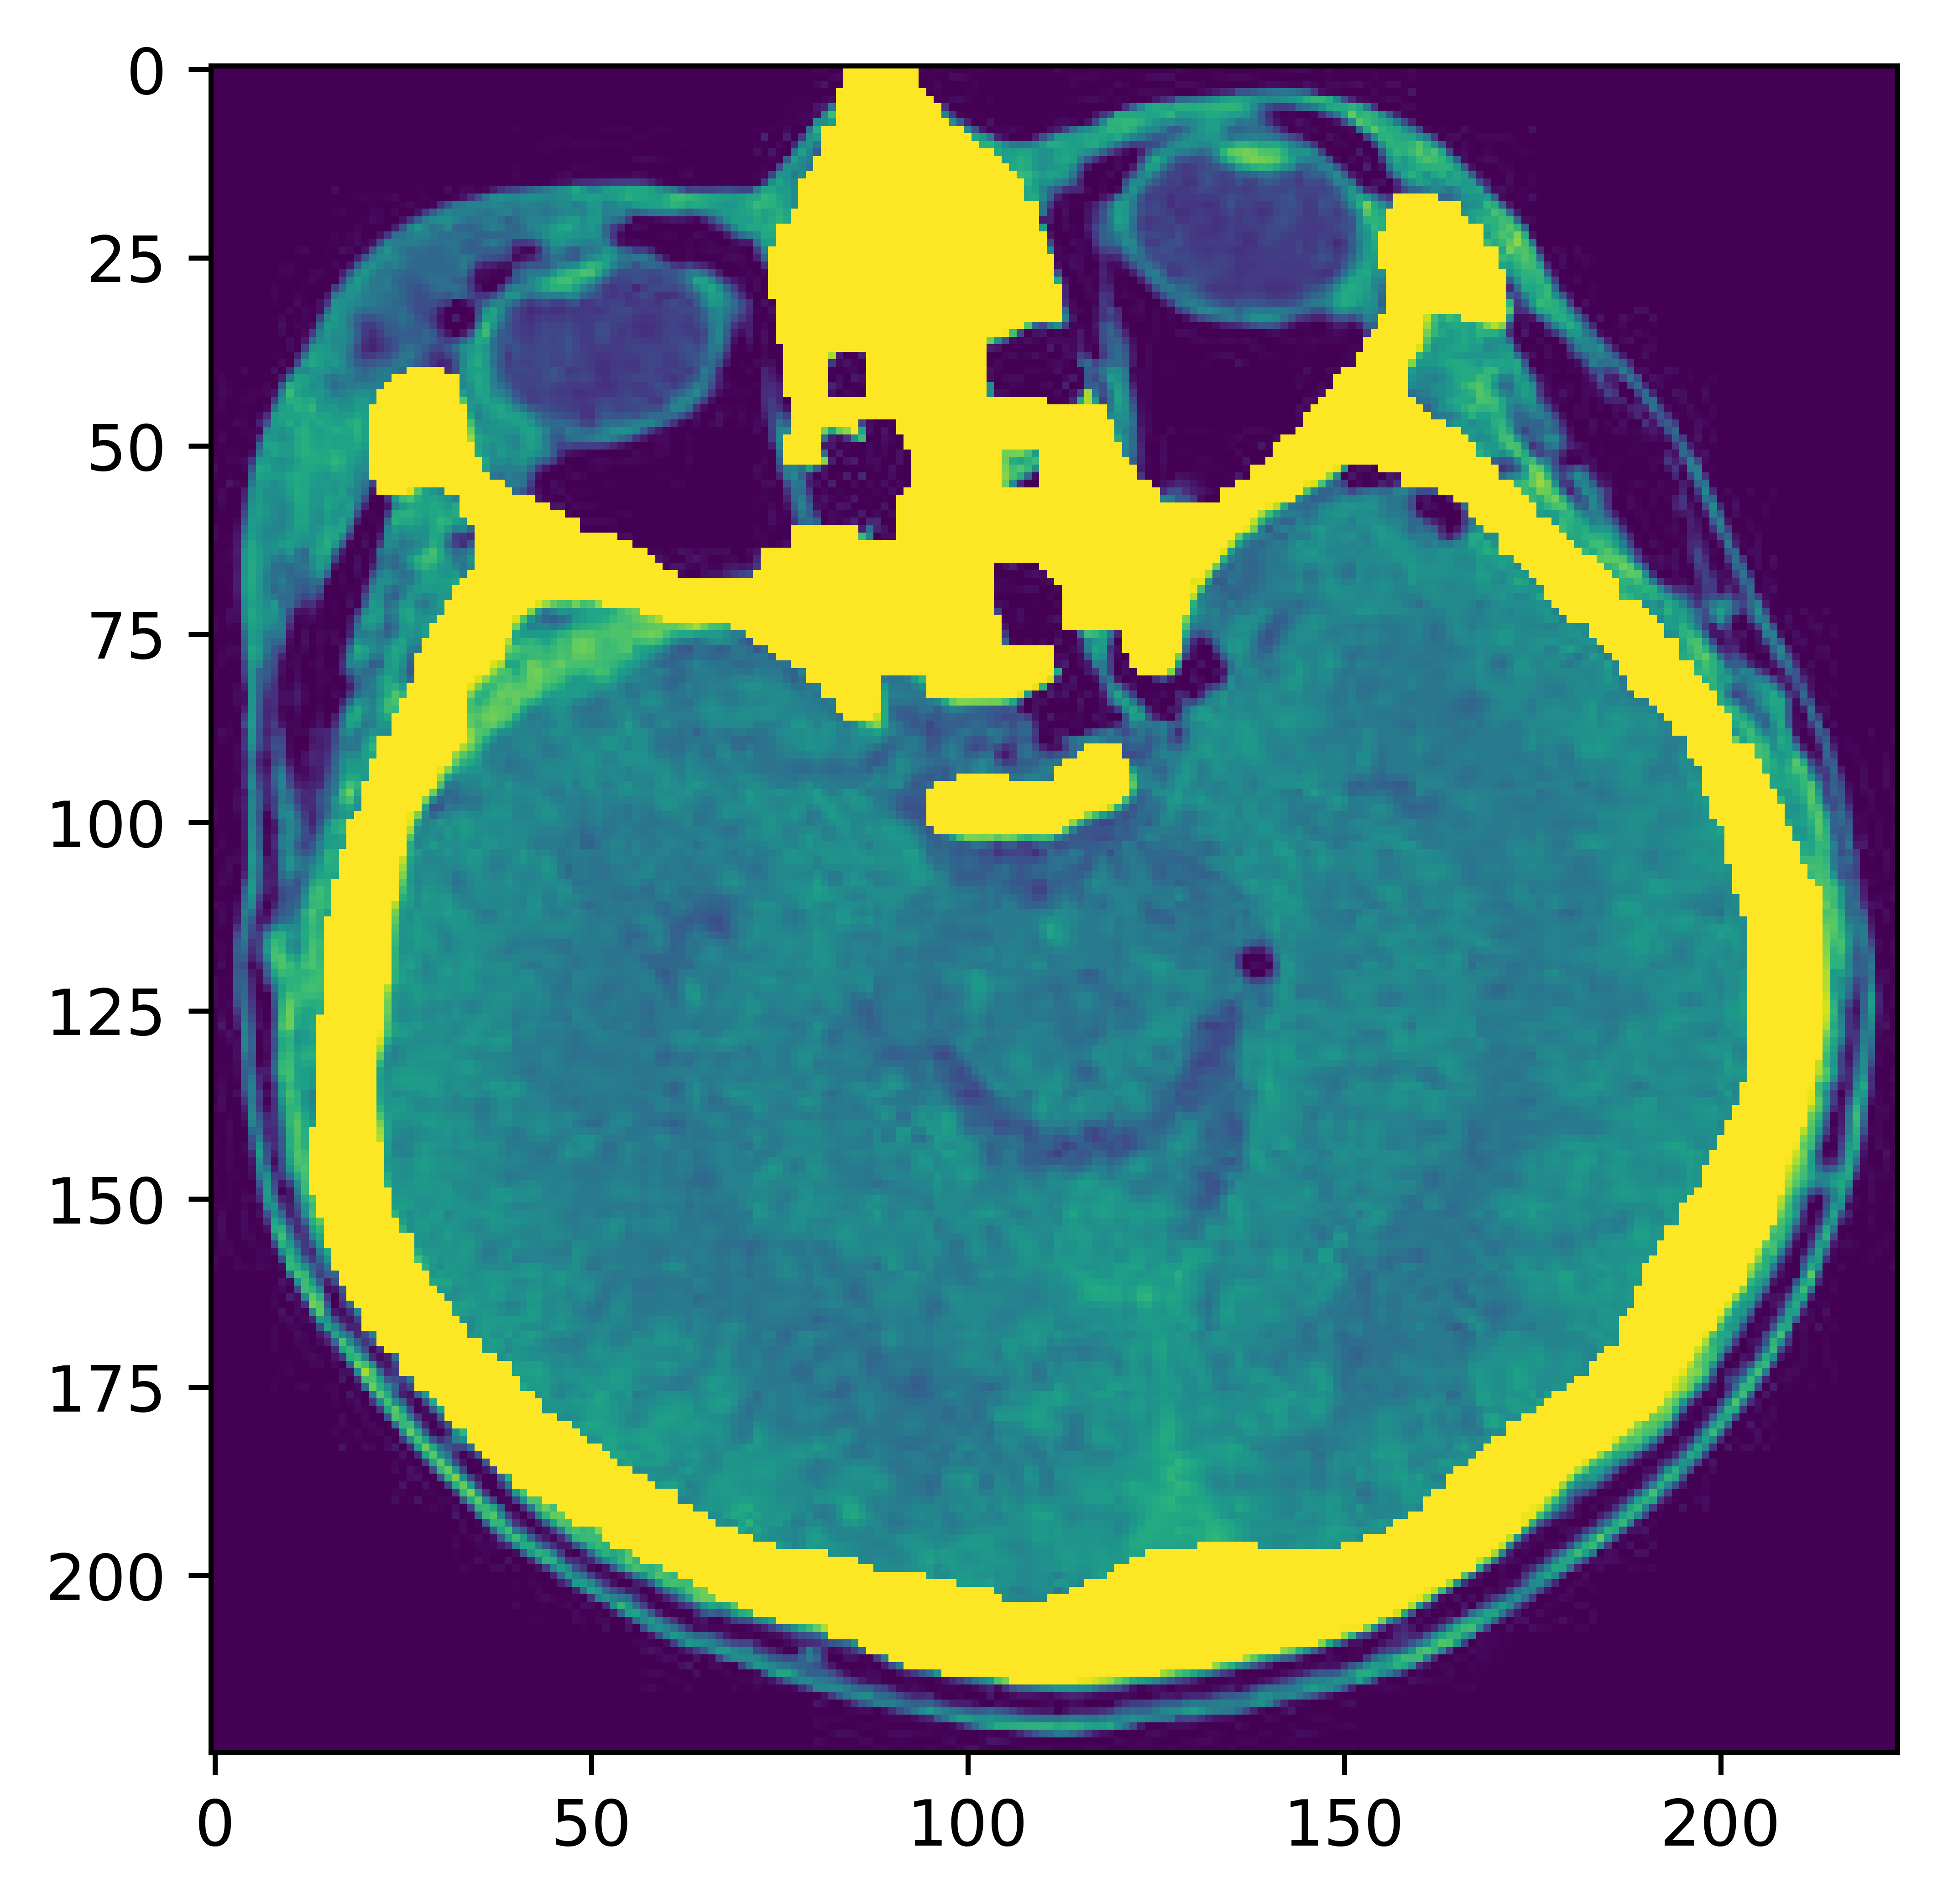

In [61]:
plt.figure(dpi  =1000)
plt.imshow(close_skull(image))

(214, 200)


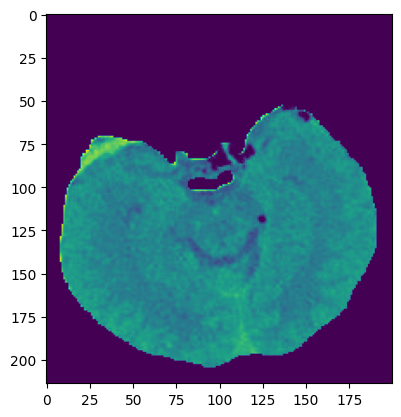

In [62]:
#new_im = morphology.erosion(new_img, np.ones((3, 3)))
print(new_img.shape)
new_im = pre.nice(new_img)

plt.imshow(new_im)


1.0


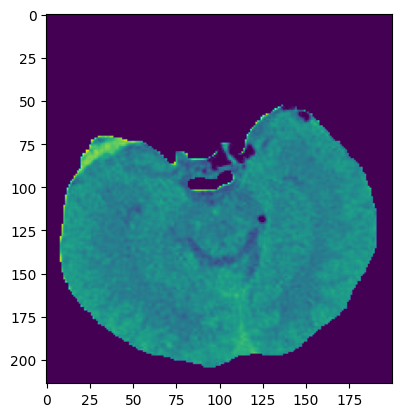

In [63]:
image = pre.normalise(new_im)
plt.imshow(image)
print(image.max())

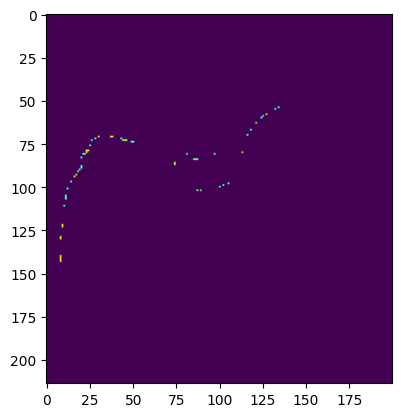

In [64]:
bin = pre.binarize_jan(image, 1.0, 0.85)
plt.imshow(bin)


(214, 199)


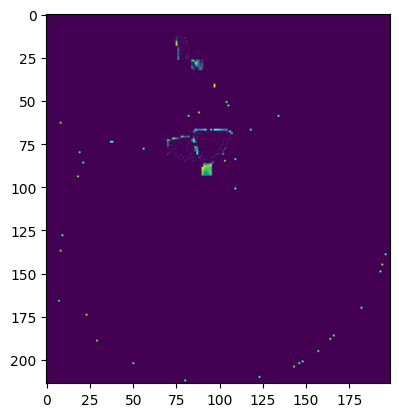

In [65]:
cos = io.imread('CT/test/Homm/49_15.jpg')

new_img = pre.delete_skull(pre.crop(pre.flood_(close_skull(cos))))
plt.imshow(new_img)